In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection,metrics

In [122]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(['Unnamed: 0','text','url','title','date','days'],axis=1).drop_duplicates(subset=None, keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2387
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 2017 non-null   float64
 1   location              2017 non-null   object 
 2   numimage              2017 non-null   float64
 3   condition             2017 non-null   object 
 4   makemanufacturer      2017 non-null   float64
 5   modelnamenumber       2017 non-null   float64
 6   bicycleframematerial  2017 non-null   object 
 7   bicycletype           2017 non-null   object 
 8   braketype             2017 non-null   object 
 9   electricassist        2017 non-null   float64
 10  framesize             2017 non-null   object 
 11  handlebartype         2017 non-null   object 
 12  suspension            2017 non-null   float64
 13  wheelsize             2017 non-null   object 
 14  sizedimensions        2017 non-null   int64  
 15  serialnumber         

In [123]:
df = df[(30<df.price)&(df.price<1000)]
df

,price,location,numimage,condition,makemanufacturer,modelnamenumber,bicycleframematerial,bicycletype,braketype,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured
4,112.0,auburn,4.0,excellent,1.0,1.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
5,167.0,auburn,7.0,excellent,1.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
6,125.0,auburn,9.0,good,1.0,1.0,aluminum,mountain,special,0.0,medium,special,1.0,26,0,0,0,0
7,75.0,auburn,0.0,poor,0.0,0.0,aluminum,mountain,mechanical,0.0,unknown,unknown,0.0,unknown,0,0,0,0
8,500.0,auburn,0.0,unknown,0.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,75.0,seattle,2.0,unknown,1.0,1.0,unknown,unknown,unknown,0.0,large,unknown,0.0,26,0,0,0,0
2384,100.0,seattle,2.0,fair,1.0,1.0,aluminum,mountain,mechanical,0.0,large,unknown,0.0,24,0,1,0,0
2385,110.0,seattle,10.0,good,1.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
2386,50.0,seattle,3.0,unknown,0.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0


In [124]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 4 to 2387
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1110 non-null   float64
 1   numimage                           1110 non-null   float64
 2   makemanufacturer                   1110 non-null   float64
 3   modelnamenumber                    1110 non-null   float64
 4   electricassist                     1110 non-null   float64
 5   suspension                         1110 non-null   float64
 6   sizedimensions                     1110 non-null   int64  
 7   serialnumber                       1110 non-null   int64  
 8   paintcolor                         1110 non-null   int64  
 9   yearmanufactured                   1110 non-null   int64  
 10  location_atlanta                   1110 non-null   uint8  
 11  location_auburn                    1110 non-null   uint8

In [125]:
linear_regression = linear_model.LinearRegression()

X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

,numimage,makemanufacturer,modelnamenumber,electricassist,suspension,sizedimensions,serialnumber,paintcolor,yearmanufactured,location_atlanta,...,wheelsize_16,wheelsize_18,wheelsize_20,wheelsize_24,wheelsize_25,wheelsize_26,wheelsize_27,wheelsize_28,wheelsize_29,wheelsize_unknown
4,4.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,7.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,9.0,1.0,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,2.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2384,2.0,1.0,1.0,0.0,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2385,10.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2386,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [126]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [127]:
linear_regression.intercept_

180616296082997.97

In [128]:
linear_regression.coef_

array([ 8.46241206e+00, -4.17389922e+00,  5.10025761e+01,  2.11285294e+02,
       -4.88411861e+01, -1.21666318e+02, -2.24548994e+01,  3.76563912e+02,
       -1.50840481e+02, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12, -9.51860537e+12, -9.51860537e+12,
       -9.51860537e+12, -9.51860537e+12,  1.79365801e+13,  1.79365801e+13,
        1.79365801e+13,  1.79365801e+13,  1.79365801e+13,  1.09278820e+14,
        1.09278820e+14,  1.09278820e+14,  1.09278820e+14,  1.09278820e+14,
        1.09278820e+14,  1.09278820e+14,  1.09278820e+14,  9.50788755e+13,
        9.50788755e+13,  9.50788755e+13,  9.50788755e+13,  9.50788755e+13,
        9.50788755e+13,  

In [118]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linear_regression.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %linear_regression.score(X_test,y_test))

Coefficients: 
 [ 5.66912622e+00 -3.54678305e+01  7.91218961e+01  1.84050303e+02
 -4.90736347e+01 -1.22055433e+02 -3.42959966e+01  3.81794820e+02
 -1.44393991e+02  4.25635387e-01  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12  1.51749007e+12
  1.51749007e+12  1.51749007e+12  1.51749007e+12 -2.48938025e+13
 -2.48938025e+13 -2.48938025e+13 -2.48938025e+13 -2.48938025e+13
 -1.10273564e+12 -1.10273564e+12 -1.10273564e+12 -1.10273564e+12
 -1.10273564e+12 -1.10273564e+12 -1.10273564e+12 -1.10273564e+12
 -1.39319438e+13 -1.39319438e+13 -1.39319438e+13 -1.39319438e+13
 -1.39319438e+13 -1.39319438e+13 -1.39319438e+13 -1.39319438e+13
  1.83423813e+07 -1.39319438e+13 -1.39319438e+13 -1.39319438e+13
 -1.39319

In [119]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_values(by='Actual')
df_pred

,Actual,Predicted
1810,35.0,140.546875
1672,35.0,265.781250
752,35.0,271.796875
1117,35.0,147.531250
1445,35.0,161.625000
...,...,...
142,949.0,260.468750
377,950.0,183.234375
627,995.0,523.875000
1979,999.0,375.031250


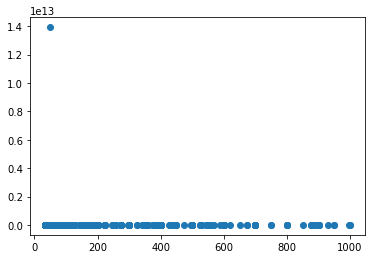

In [120]:
from matplotlib import pyplot as plt

plt.scatter(df_pred['Actual'],df_pred['Predicted'])

<AxesSubplot:>

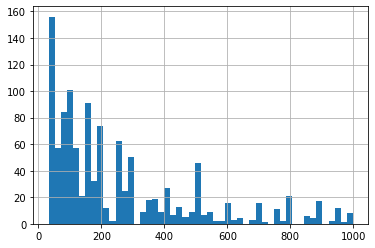

In [121]:
df['price'].hist(bins=50)